azaba@agh.edu.pl

środa 11.30-13.00 konsultacje



In [54]:
!pip install --quiet pint
!pip install --quiet open_atmos_jupyter_utils


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.7 MB/s eta 0:00:00


In [55]:
from pint import UnitRegistry
import scipy.constants as const
from open_atmos_jupyter_utils import show_plot

In [24]:
si = UnitRegistry()
a=(2*si.erg + 10*si.erg)+12*si.J
a.to_base_units()


<Quantity(12.0000012, 'kilogram * meter ** 2 / second ** 2')>

In [25]:
a.to(si.J)

<Quantity(12.0000012, 'joule')>

In [45]:
molar_mass_dry_air = 28.966 *si.kg/si.kmol
Rd = const.R*(si.J/si.mol/si.K)/molar_mass_dry_air
Rd = Rd.to_base_units()
print(Rd)
def rho(p,T,Rd):
  return (p/(Rd*T)).to_base_units()

287.0421396862956 meter ** 2 / kelvin / second ** 2


In [46]:
print(rho(1013*si.hPa, 296*si.K, Rd))

1.192263024877629 kilogram / meter ** 3


In [47]:
from matplotlib import pyplot as plt
import numpy as np

In [48]:
si.setup_matplotlib()

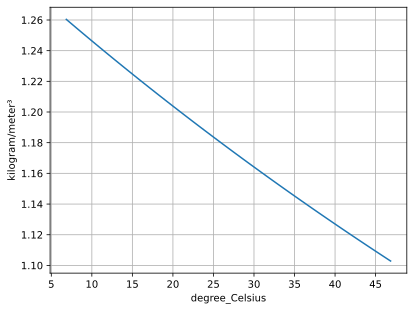

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
plt.plot(
    T:=np.linspace(280,320,100)*si.K,
    rho(p=1013*si.hPa,T=T, Rd =Rd),
    label = "Gęstość powietrza w sali"
    )
plt.gca().xaxis.set_units(si.celsius)
plt.gca().yaxis.set_units(si.kg/si.m**3)
plt.grid()
show_plot("gestosc_powietzra")